# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [88]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [89]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

#plt.plot(pyber_data_df["date"], pyber_data_df.type)
#plt.show()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [90]:
#  1. Get the total rides for each city type

ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [91]:
# 2. Get the total drivers for each city type

drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [92]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [93]:
#  4. Get the average fare per ride for each city type. 

average_fare_ride = total_fares / ride_count
average_fare_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [94]:
# 5. Get the average fare per driver for each city type. 

average_fare_driver = total_fares / drivers_count
average_fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [95]:
#  6. Create a PyBer summary DataFrame. 


pyber_summary = [{"Type": "Rural","Total Rides": ride_count[0], "Total Drivers": drivers_count[0], "Total Fars": total_fares[0], "Average Fares Per Ride": average_fare_ride[0], "Average Fares Per Driver": average_fare_driver[0]},
                {"Type": "Suburban","Total Rides": ride_count[1], "Total Drivers": drivers_count[1], "Total Fars": total_fares[1], "Average Fares Per Ride": average_fare_ride[1], "Average Fares Per Driver": average_fare_driver[1]},
                {"Type": "Urban","Total Rides": ride_count[2], "Total Drivers": drivers_count[2], "Total Fars": total_fares[2], "Average Fares Per Ride": average_fare_ride[2], "Average Fares Per Driver": average_fare_driver[2]}]

pyber_summary_df = pd.DataFrame(pyber_summary)

pyber_summary_df.head(10)

,Type,Total Rides,Total Drivers,Total Fars,Average Fares Per Ride,Average Fares Per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [96]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fars,Average Fares Per Ride,Average Fares Per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [97]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Fars"] = pyber_summary_df["Total Fars"].map("${:,.2f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Average Fares Per Ride"] = pyber_summary_df["Average Fares Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fares Per Driver"] = pyber_summary_df["Average Fares Per Driver"].map("${:,.2f}".format)


pyber_summary_df.head()

,Type,Total Rides,Total Drivers,Total Fars,Average Fares Per Ride,Average Fares Per Driver
0,Rural,125,78,"$4,327.93",$34.62,$55.49
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [98]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [99]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_df["date"]=pd.to_datetime(pyber_data_df["date"])

total_fares_for_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

# total_fares_for_date.head(20)
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [100]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

total_fares_for_date = total_fares_for_date.reset_index()
total_fares_for_date.head(20)


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [101]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_for_date_pivot=total_fares_for_date.pivot(index="date", columns="type",values="fare")
total_fares_for_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [102]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

total_fares_for_date_pivot = total_fares_for_date_pivot.loc['2019-01-01':'2019-04-28'] 


#total_fares_for_date_pivot1 = total_fares_for_date_pivot.loc[(total_fares_for_date_pivot["date"] >= '2019-01-01') & (total_fares_for_date_pivot["date"] <= "2019-04-29")]


total_fares_for_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [103]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

total_fares_for_date_pivot.index = pd.to_datetime(total_fares_for_date_pivot.index)
total_fares_for_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [104]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fares_for_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [105]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

total_fares_for_week = total_fares_for_date_pivot.resample('W').sum()
#total_fares_for_week = total_fares_for_week.reset_index()
total_fares_for_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [106]:
total_fares_for_week.columns

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

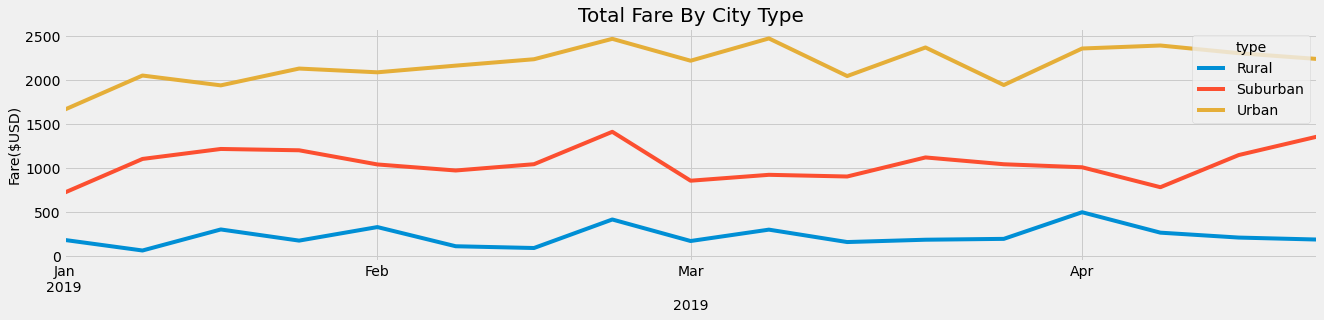

In [107]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax=total_fares_for_week.plot(figsize=(20, 4))


#x_labels = ["Jan", "Feb","Mar", "Apr"]
ax.set_title('Total Fare By City Type',fontsize=20)
ax.set_ylabel("Fare($USD)",fontsize=14)
ax.set_xlabel("2019",fontsize=14)

plt.savefig("C:/UCD/PyBer_Analysis/Fig2.png")


plt.show()
